In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Self-Driving Car/myData" # folder with all the class folders
labelFile = '/content/drive/MyDrive/Colab Notebooks/Self-Driving Car/labels.csv' # file with all names of classes
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################

In [ ]:
count = 0
images = []
classNo = []
myList = os.listdir(path)

print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 3
Importing Classes.....
0 1 2  


In [ ]:
print(classNo)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [ ]:
print(X_train.shape)
print(imageDimesions)

(1824, 32, 32, 3)
(32, 32, 3)


In [ ]:
############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==imageDimesions)," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(1824, 32, 32, 3) (1824,)
Validation(456, 32, 32, 3) (456,)
Test(570, 32, 32, 3) (570,)


In [ ]:
############################### READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (3, 2) <class 'pandas.core.frame.DataFrame'>


In [ ]:
data

In [ ]:
print(len(images))

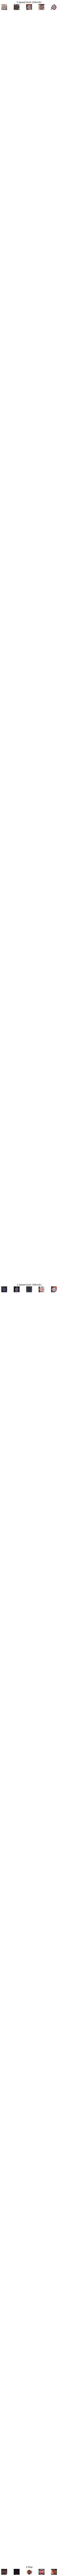

In [ ]:
############################### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[116, 1262, 446]


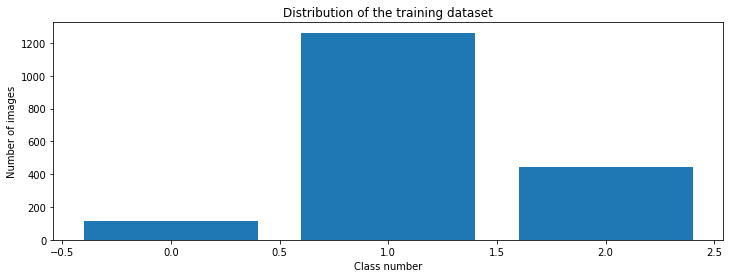

In [ ]:
############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train[0].shape

In [ ]:
temp = cv2.cvtColor(X_train, cv2.COLOR_BGR2GRAY)

In [ ]:
temp.shape

In [ ]:
temp_iter = iter(X_train)

In [ ]:
type(temp_iter)

In [ ]:
next(temp_iter).shape

In [ ]:
############################### PREPROCESSING THE IMAGES

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img=img/255      # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

X_train=np.array(list(map(preprocessing, iter(X_train))))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing, iter(X_validation))))
X_test=np.array(list(map(preprocessing, iter(X_test))))
print(X_test[1:8])
# cv2_imshow("GrayScale Images", X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

[[[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         0.99215686 0.96470588 ... 0.78823529 0.76862745 0.78823529]
  [1.         0.98823529 0.96862745 ... 0.74901961 0.74117647 0.74117647]
  [1.         0.98431373 0.95686275 ... 0.76862745 0.78823529 0.75294118]
  ...
  [0.9372549  0.84705882 0.69019608 ... 0.4        0.41960784 0.46666667]
  [0.92156863 0.83137255 0.70588235 ... 0.37647059 0.49803922 0.62745098]
  [0.91764706 0.83137255 0.70588235 ... 0.4        0.51764706 0.6627451 ]]

 [[0.02352941 0.04705882 0.07843137 ... 0.89803922 0.89019608 0.8745098 ]
  [0.04705882 0.078431

In [ ]:
############################### ADD A DEPTH OF 1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

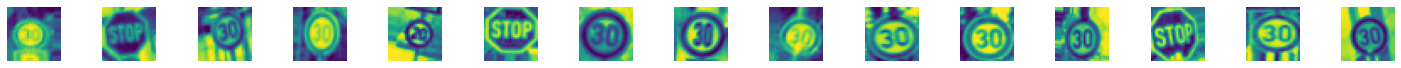

In [ ]:
############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)

# TO SHOW AGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()


y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [ ]:
print(y_test)

In [ ]:
############################### CONVOLUTION NEURAL NETWORK MODEL
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                         # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS

    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [ ]:
print(len(X_train),len(y_train))

In [ ]:
print(len(os.listdir(path+'/0')))
print(len(os.listdir(path+'/1')))
print(len(os.listdir(path+'/2')))

180
1980
690


In [ ]:
batch_size_val= 15    # how many to process together
epochs_val=20
steps_per_epoch_val=len(X_train)//batch_size_val
############################### TRAIN
model = myModel()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)          0

In [ ]:
type(model)

In [ ]:
model

In [ ]:
print(history.history)

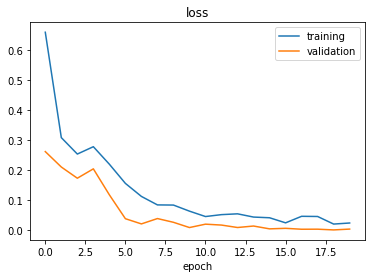

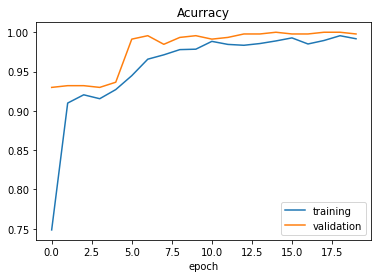

Test Score: 0.0009823240106925368
Test Accuracy: 1.0


In [ ]:
############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Self-Driving Car/model_keras")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/TrafficSignal/model_keras/assets


Trying out a lot of other codes to export the trained model

In [ ]:
##################Final pb pbtxt#####################

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import numpy as np
#path of the directory where you want to save your model
frozen_out_path = '/content/drive/MyDrive/Colab Notebooks/Signal'
# name of the .pb file
frozen_graph_filename = "frozen_graph"
#model = # Your model
# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))
# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)
# Save frozen graph to disk
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)
# Save its text representation
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)

------------------------------------------------------------
Frozen model layers: 
x
sequential_1/conv2d_4/Conv2D/ReadVariableOp/resource
sequential_1/conv2d_4/Conv2D/ReadVariableOp
sequential_1/conv2d_4/Conv2D
sequential_1/conv2d_4/BiasAdd/ReadVariableOp/resource
sequential_1/conv2d_4/BiasAdd/ReadVariableOp
sequential_1/conv2d_4/BiasAdd
sequential_1/conv2d_4/Relu
sequential_1/conv2d_5/Conv2D/ReadVariableOp/resource
sequential_1/conv2d_5/Conv2D/ReadVariableOp
sequential_1/conv2d_5/Conv2D
sequential_1/conv2d_5/BiasAdd/ReadVariableOp/resource
sequential_1/conv2d_5/BiasAdd/ReadVariableOp
sequential_1/conv2d_5/BiasAdd
sequential_1/conv2d_5/Relu
sequential_1/max_pooling2d_2/MaxPool
sequential_1/conv2d_6/Conv2D/ReadVariableOp/resource
sequential_1/conv2d_6/Conv2D/ReadVariableOp
sequential_1/conv2d_6/Conv2D
sequential_1/conv2d_6/BiasAdd/ReadVariableOp/resource
sequential_1/conv2d_6/BiasAdd/ReadVariableOp
sequential_1/conv2d_6/BiasAdd
sequential_1/conv2d_6/Relu
sequential_1/conv2d_7/Conv2D/Rea

'/content/drive/MyDrive/Colab Notebooks/Signal/frozen_graph.pbtxt'

In [ ]:
###Save as pb && pbtxt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import numpy as np

#path of the directory where you want to save your model
frozen_out_path = "/content/drive/MyDrive/Colab Notebooks/Signal"
# name of the .pb file
frozen_graph_filename = "frozen_graph"
#model = # Your model

In [ ]:
# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

In [ ]:
# Get frozen graph def
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

In [ ]:
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

In [ ]:
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/Signal/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/Signal/model.h5")
print("Saved model to disk")

In [ ]:
from tensorflow import keras
models = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Signal/model_keras')

In [ ]:
x_nabil=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Signal/asd.png")

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img=img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'

In [ ]:
img = np.asarray(x_nabil)

In [ ]:
print(np.size(img))
cv2_imshow(img)

frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX


In [ ]:
img = cv2.resize(img, (32, 32))
cv2_imshow(img)
img = preprocessing(img)
cv2_imshow(img)

img = img.reshape(1, 32, 32, 1)
#cv2.putText(x_nabil, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
#cv2.putText(x_nabil, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2_imshow(x_nabil)


In [ ]:
ynew= models.predict_classes(img)
yprob = models.predict_proba(img)

In [ ]:
print(" Predicted=",  ynew,"prob:", yprob[0][ynew][0])

In [ ]:
x_nabil=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Signal/asd.png")
img = np.asarray(x_nabil)
print(np.size(img))
#cv2_imshow(img)

frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.resize(img, (32, 32))
cv2_imshow(img)
img = preprocessing(img)
#cv2_imshow(img)

img = img.reshape(1, 32, 32, 1)
#cv2.putText(x_nabil, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
#cv2.putText(x_nabil, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
#cv2_imshow(x_nabil)

ynew= models.predict_classes(img)
yprob = models.predict_proba(img)

print(" Predicted=",  getCalssName(ynew),"prob:", yprob)

In [ ]:
#Do not run


import types
import tempfile
import keras.models

def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            keras.models.save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = { 'model_str': model_str }
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = keras.models.load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = keras.models.Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__

make_keras_picklable()

In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/Signal/model_keras')

# STORE THE MODEL AS A PICKLE OBJECT
pickle_out= open("/content/drive/MyDrive/Colab Notebooks/Signal/model_trained.pkl","wb")  # wb = WRITE BYTE

pickle.dump(model, pickle_out)
pickle_out.close()
cv2.waitKey(0)